# Modelos de difusão

In [4]:
import networkx as nx
from numpy.random import default_rng
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np

## Modelo SI

No modelo SI os nós da rede podem se encontrar em dois estados: suscetível (S) ou infectado (I).

Os indivíduos suscetíveis são aqueles que ainda não possuem a doença, ou não ficaram sabendo de uma notícia, mas podem se tornar infectados se entrarem em contato com indivíduos infectados. 

Os infectados são aqueles que já possuem a doença ou já sabem da notícia e podem tornar indivíduos suscetíveis infectados ao entrar em contato com eles.

No **modelo SI**, existe um parâmetro $\beta$ que representa a velocidade que um indivíduo infectado contagia um dos seus vizinhos suscetíveis na rede.

Existem duas formas de analisar a dinâmica do processo a depender se o tempo é modelado de forma discreta ou contínua. 

Considere que $i$ é um indivíduo infectado e $j$ é um vizinho de $i$ suscetível. 

No caso de tempo discreto, existe uma probabilidade $\beta$ de $i$ contagiar $j$, a cada unidade de tempo. 

No caso contínuo, o tempo que leva para $j$ ser contagiado por $i$ segue uma distribuição exponencial com parâmetro $\beta$.

O processo se inicia com alguns nós inicialmente infectados e, como os nós infectados permanecem para sempre neste estado e, eventualmente, infectam todos os seus vizinhos, após um longo período de tempo todos os nós que pertencem a alguma componente que contenha um nó inicialmente infectado estarão infectados.

### Exemplo

Em uma simulação do modelo SI em tempo discreto cada nó da rede precisa de dois atributos, o estado atual e o próximo estado. 

Em cada instante de tempo, o processo tem duas fases:

1. Para cada vértice, se o estado dele for S, deve avaliar-se a probabilidade de passar ao estado I. 
Se o vértice $i$ tiver $d^I(i)$ vizinhos infectados, então a probabilidade de não contagiar-se é
$$
p_{\mathrm{nc}} = (1-\beta)^{d^I(i)},
$$

e a probabilidade de ser contagiado pelo menos um desses vizinhos é
$$
\begin{align*}
p_{\mathrm{c}} & = 1-p_{\mathrm{nc}} \\
& = 1 - (1-\beta)^{d^I(i)}.
\end{align*}
$$

Uma vez calculada a probabilidade de contágio, pode-se decidir se o vértice passará ao estado I, em cujo caso muda-se o próximo estado do vértice para I.

2. Para cada vértice, atualiza-se o estado de acordo com o valor do próximo estado definido na primeira fase. 

No seguinte script apresentamos este tipo de simulação, usando dois valores de $\beta$. 

Usamos a função **deepcopy()** para que as duas simulações sejam feitas com exatamente as mesmas condições iniciais: uma rede de Barabási-Albert com 1000 nós e 3 ligações por vértice, com aproximadamente $10\%$ dos vértices inicialmente infectados.

In [5]:
# retorna o número de infectados

def numinf(g):
    num = 0
    for n in g.nodes:
        if g.nodes[n]['estado'] == 1:
            num += 1

    return num

In [6]:
# retorna o número de vizinhos de um infectado

def numinfviz(g,n):
    num = 0
    for m in nx.neighbors(g,n):
        if g.nodes[m]['estado'] == 1:
            num += 1
    
    return num

In [7]:
# modelo si
# g: rede
# beta: 
# M:
# rng: 
def si(g,beta,M,rng):
    
    delta = [0]*(M+1)
    delta[0] = numinf(g)/g.order()

    for k in range(M):
        for n in g.nodes:
            # O vértice é suscetível?
            if g.nodes[n]['estado'] == 0:
                p = (1-(1-beta)**numinfviz(g,n)) # probabilidade de contágio
                if rng.random() < p: # o vértice contagia-se?
                    g.nodes[n]['estado-prox'] = 1
                else:
                    g.nodes[n]['estado-prox'] = 0
                    
        num = 0
        for n in g.nodes:
            if g.nodes[n]['estado'] == 0:
                g.nodes[n]['estado'] = g.nodes[n]['estado-prox']
            if g.nodes[n]['estado'] == 1:
                num += 1
        delta[k+1] = num/g.order()
        
    return delta


In [8]:
def init(g,p,rng):
    for n in g.nodes:
        g.nodes[n]['estado-prox'] = 0
        if rng.random() < p:
            g.nodes[n]['estado'] = 1 # I = 1
        else:
            g.nodes[n]['estado'] = 0 # S = 0

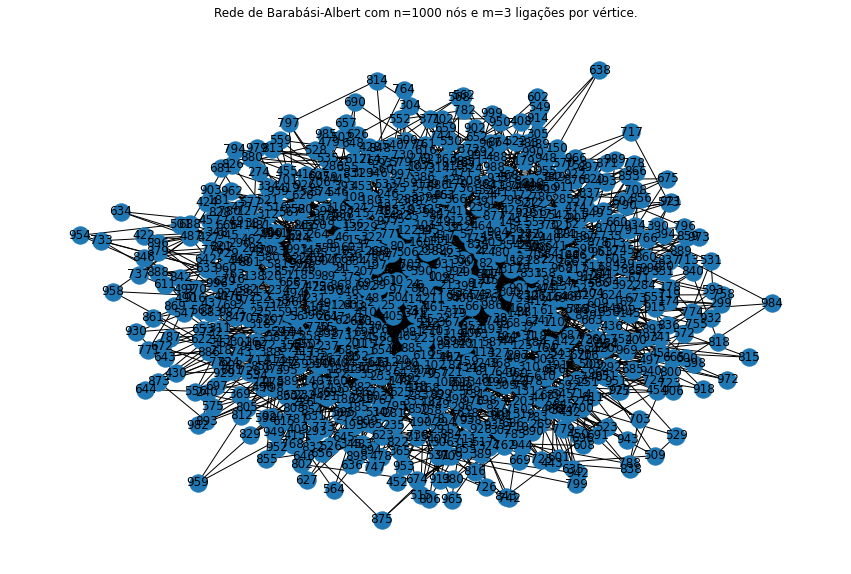

In [9]:
# rede barabasi_albert_graph

G3 = nx.barabasi_albert_graph(1000,3)

fig = plt.subplots(1,1,figsize=(15,10))
ax = plt.gca()
seed = 1234
pos = nx.spring_layout(G3, seed=seed)
ax.set_title('Rede de Barabási-Albert com n=1000 nós e m=3 ligações por vértice.')
nx.draw(G3, pos=pos, with_labels=True,ax=ax)
plt.show()

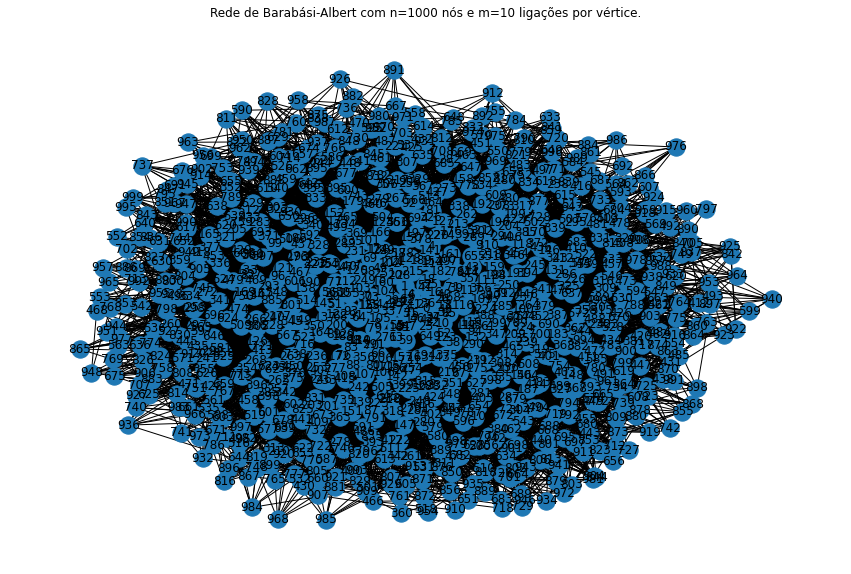

In [11]:
# rede barabasi_albert_graph

G10 = nx.barabasi_albert_graph(1000,10)

fig = plt.subplots(1,1,figsize=(15,10))
ax = plt.gca()
seed = 1234
pos = nx.spring_layout(G10, seed=seed)
ax.set_title('Rede de Barabási-Albert com n=1000 nós e m=10 ligações por vértice.')
nx.draw(G10, pos=pos, with_labels=True,ax=ax)
plt.show()

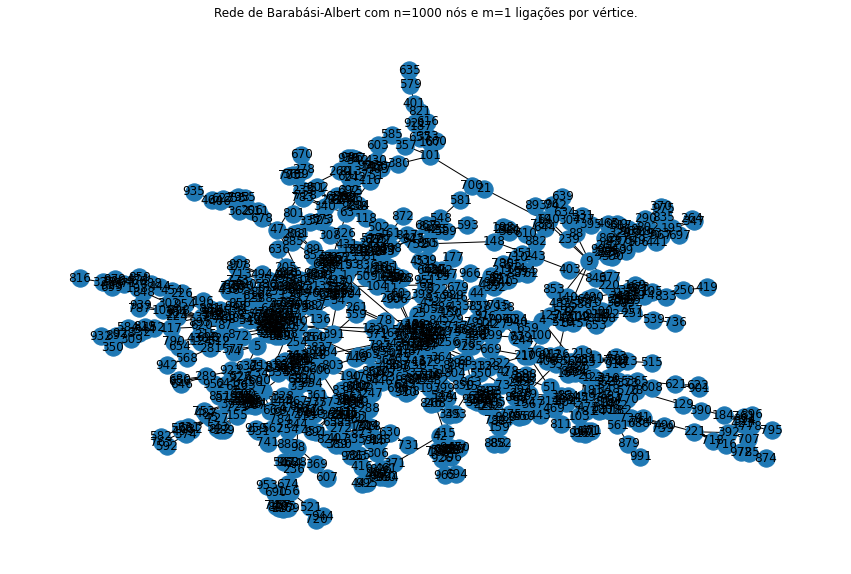

In [12]:
# rede barabasi_albert_graph

G1 = nx.barabasi_albert_graph(1000,1)

fig = plt.subplots(1,1,figsize=(15,10))
ax = plt.gca()
seed = 1234
pos = nx.spring_layout(G1, seed=seed)
ax.set_title('Rede de Barabási-Albert com n=1000 nós e m=1 ligações por vértice.')
nx.draw(G1, pos=pos, with_labels=True,ax=ax)
plt.show()

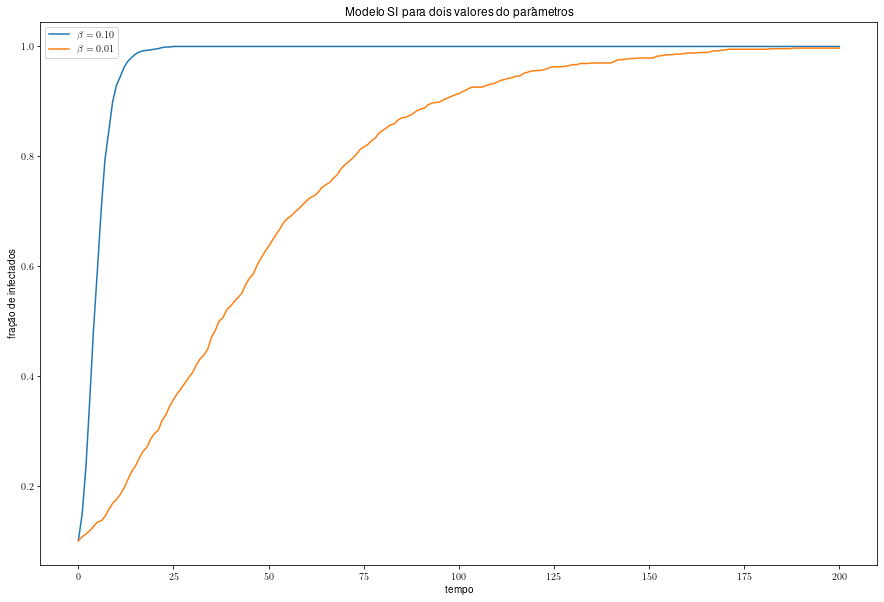

In [13]:
# rede G3

# gerador de números aleatórios
rng = default_rng()

# aproximadamente um 10% dos nós estão inicialmente infectados
init(G3,0.1,rng)

G = deepcopy(G3)
dens1 = si(G,0.1,200,rng)

G = deepcopy(G3)
dens2 = si(G,0.01,200,rng)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.close('all')
fig = plt.subplots(1,1,figsize=(15,10))
plt.plot(dens1,label=r'$\beta = 0.10$')
plt.plot(dens2,label=r'$\beta = 0.01$')
plt.legend()
plt.xlabel('tempo')
plt.ylabel('fração de infectados')

plt.title('Modelo SI para dois valores do parâmetros')

plt.show()

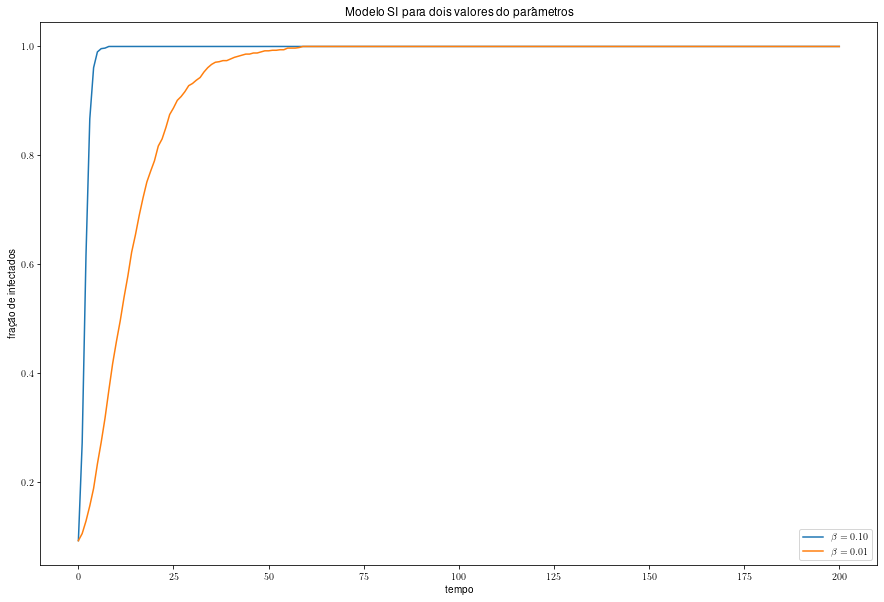

In [14]:
# rede G10

# gerador de números aleatórios
rng = default_rng()

# aproximadamente um 10% dos nós estão inicialmente infectados
init(G10,0.1,rng)

G = deepcopy(G10)
dens1 = si(G,0.1,200,rng)

G = deepcopy(G10)
dens2 = si(G,0.01,200,rng)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.close('all')
fig = plt.subplots(1,1,figsize=(15,10))
plt.plot(dens1,label=r'$\beta = 0.10$')
plt.plot(dens2,label=r'$\beta = 0.01$')
plt.legend()
plt.xlabel('tempo')
plt.ylabel('fração de infectados')

plt.title('Modelo SI para dois valores do parâmetros')

plt.show()

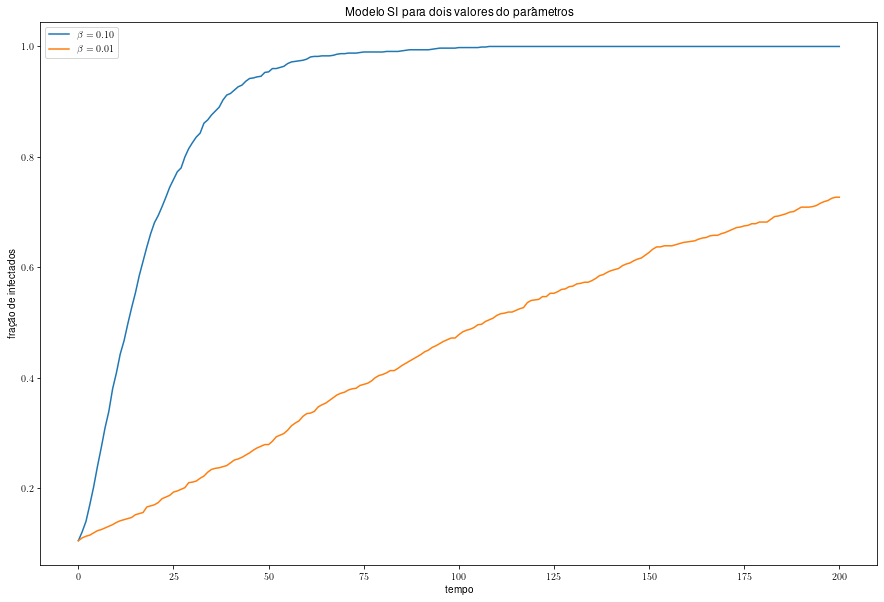

In [15]:
# rede G1

# gerador de números aleatórios
rng = default_rng()

# aproximadamente um 10% dos nós estão inicialmente infectados
init(G1,0.1,rng)

G = deepcopy(G1)
dens1 = si(G,0.1,200,rng)

G = deepcopy(G1)
dens2 = si(G,0.01,200,rng)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.close('all')
fig = plt.subplots(1,1,figsize=(15,10))
plt.plot(dens1,label=r'$\beta = 0.10$')
plt.plot(dens2,label=r'$\beta = 0.01$')
plt.legend()
plt.xlabel('tempo')
plt.ylabel('fração de infectados')

plt.title('Modelo SI para dois valores do parâmetros')

plt.show()

### Exemplo

Existem várias maneiras de frear o espalhamento de uma doença. 

Por exemplo, podem-se isolar partes da rede apagando arestas. 

Se existirem pontes, estas seriam as melhores arestas para remover porque produziriam uma separação do grafo em subgrafos isolados. 

No seguinte script as arestas são removidas ao acaso.

In [16]:
# remove arestas

def removeedges(g,p,rng):
    remove = []
    for u,v in g.edges:
        if rng.random() < p:
            remove.append((u,v))
    g.remove_edges_from(remove)
    
    return g

In [17]:
p = np.linspace(0,0.5,10)
den = np.zeros_like(p)

for k in range(p.shape[0]):
    for i in range(100):
        G = nx.barabasi_albert_graph(1000,1)
        init(G,0.1,rng)
        G = removeedges(G,p[k],rng)
        dens = si(G,0.1,200,rng)
        den[k] += dens[-1]
    print(k,den[k])

0 100.0
1 92.76100000000001
2 85.495
3 78.382
4 71.824
5 65.36299999999999
6 59.73299999999999
7 52.91899999999999
8 46.985999999999976
9 41.531000000000006


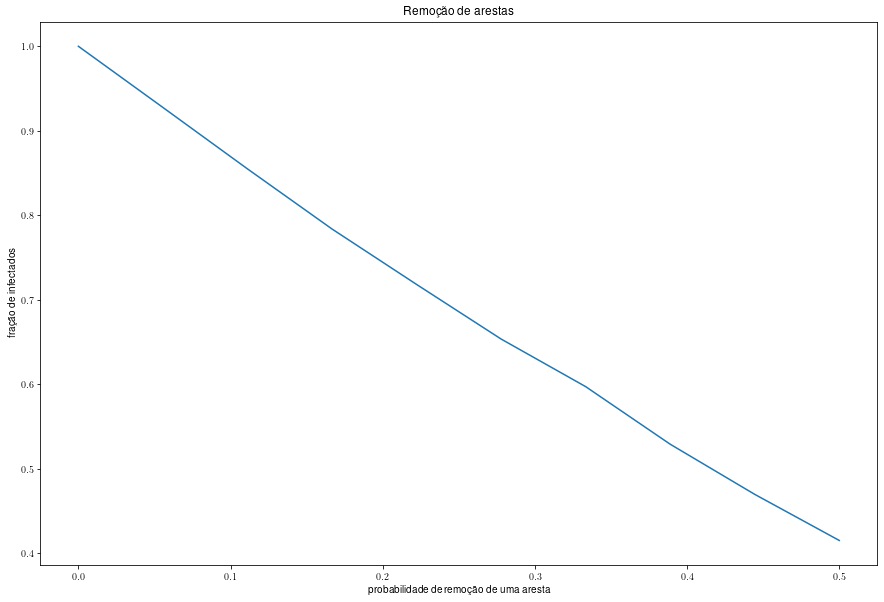

In [18]:
# Fração de vértices infectados em tempo T=200 como uma função da probabilidade de remoção de uma aresta(valores médios de 100 simulações. 
# A fração de vértices infectados é menor do que a fração média de arestas não removidas.

den = den/100

fig = plt.subplots(1,1,figsize=(15,10))
plt.plot(p,den)
plt.xlabel('probabilidade de remoção de uma aresta')
plt.ylabel('fração de infectados')
plt.title('Remoção de arestas')
plt.show()

### Exemplo

Uma outra alternativa é remover vértices da rede, i.e., isolar alguns nós. 

Se os vértices infectados forem conhecidos, estes seriam os melhores nós para remover.

In [19]:
# remoção de vértices

def removenodes(G,p,rng):
    preserve = []
    for n in G.nodes:
        if rng.random() > p:
            preserve.append(n)
    G = nx.subgraph(G,preserve)
    
    return G

In [20]:

p = np.linspace(0,0.5,10)
den = np.zeros_like(p)

for k in range(p.shape[0]):
    for i in range(100):
        G = nx.barabasi_albert_graph(1000,1)
        init(G,0.1,rng)
        G = removenodes(G,p[k],rng)
        dens = si(G,0.1,200,rng)
        den[k] += dens[-1]
    print(k,den[k])

0 100.0
1 92.91582382897612
2 84.2504188758617
3 78.12766322945049
4 72.44429155549724
5 64.23934003628223
6 58.55982080424818
7 52.17071634142115
8 46.79033111356792
9 40.90816389853013


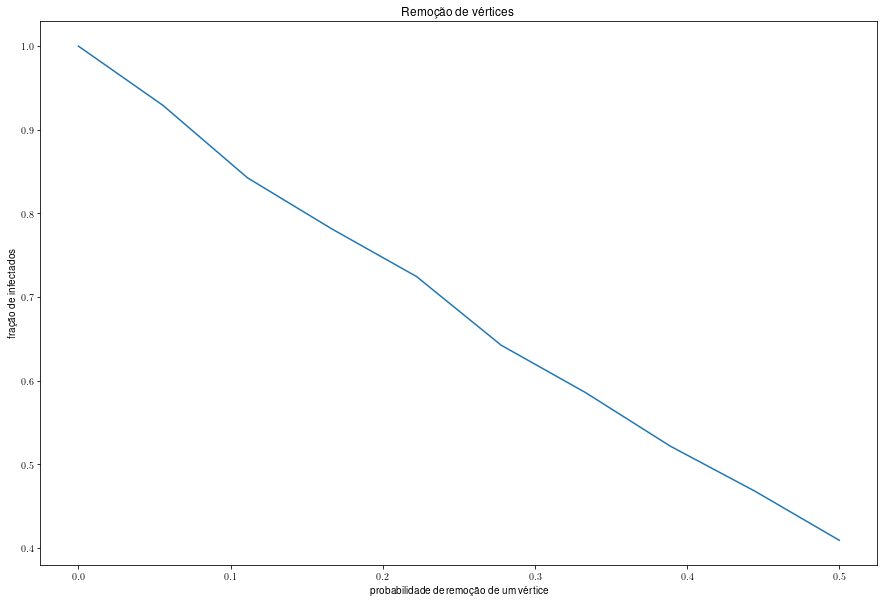

In [21]:
# apresenta a fração final de vértices infectados em tempo T = 200 como uma função da probabilidade de remoção de um vértice. 
# A fração de vértices infectados é menor do que a fração média de nós não removidos.

den = den/100

fig = plt.subplots(1,1,figsize=(15,10))

plt.plot(p,den)
plt.xlabel('probabilidade de remoção de um vértice')
plt.ylabel('fração de infectados')
plt.title('Remoção de vértices')
plt.show()

### Exemplo

A simulação do modelo SI em tempo contínuo é mais complicada do que em tempo discreto. 

Considere que o vértice $i$ é suscetível e o seu vizinho $j$ está infectado. 

O tempo até $j$ contagiar ao $i$ é
$$
T_{ji} \sim \mathrm{Exp}(\beta).
$$

Suponha que o conjunto de vizinhos infectados do vértice $i$ é $N^I(i) = \{j_1,j_2,\cdots,j_{d^I(i)}\}$. Logo, o tempo até $i$ ficar infectado é
$$
T_{\cdot i} = \min_{j\in N^I(i)} T_{ji} \sim \mathrm{Exp}\left(d^I(i)\beta\right),
$$
onde usamos o fato que a distribuição do mínimo de um conjunto de variáveis exponenciais independentes é exponencial com parâmetro igual á soma dos parâmetros de cada variável.

Seja $t_k$ o tempo infecção número $k$ numa rede. A variável exponencial não tem memória. Portanto, o tempo até a próxima infecção é
$$
t_{k+1}-t_k = \min_{i\in S(t_k)} T_{\cdot i} \sim \mathrm{Exp}\left(\sum\limits_{i\in S(t_k)} d^I(i)\beta\right).
$$
onde $S(t_k)$ é o conjunto de vértices suscetíveis em tempo $t_k^+$.

A simulação procede da seguinte maneira:

1. Depois a infecção número $k$, o algoritmo gera um tempo aleatório até a próxima infecção com distribuição exponencial de parâmetro $\sum\limits_{i\in S(t_k)} d^I(i)\beta$. 
2. Seja $S(t_k) = \{i_1,i_2,\cdots,i_S\}$ o conjunto de vértices suscetíveis em tempo $t_k^+$. Para decidir quê vértice suscetível fica infectado em tempo $t_{k+1}$, procura-se o mínimo $h$ de tal modo que
$$
\sum\limits_{u = 1}^h d^I(i_u)\beta > r \sum\limits_{i\in S(t_k)} d^I(i)\beta,
$$
onde $r$ é um número ao acaso em $[0,1)$.

Este algoritmo de simulação é conhecido como de Gillespie. 

O script implementa o algoritmo. 

In [22]:
def numinf(g):
    num = 0
    for n in g.nodes:
        if g.nodes[n]['estado'] == 1:
            num += 1

    return num

In [23]:
def numinfviz(g,n):
    num = 0
    for m in nx.neighbors(g,n):
        if g.nodes[m]['estado'] == 1:
            num += 1
    
    return num

In [24]:
def sic(g,beta,T,rng):

    num = numinf(g)    
    delta = [num/g.order()]
    t = [0]
    par = np.zeros(g.order())
    
    # em geral, os vértices podem ter nomes arbitrários
    k = 0
    vert = dict()
    for n in g.nodes:
        vert[k] = n
        k += 1
    
    while t[-1] < T:
        k = 0
        for n in g.nodes:
            # O vértice é suscetível?
            if g.nodes[n]['estado'] == 0:
                par[k] = numinfviz(g,n)*beta
            else:
                par[k] = 0
            k += 1
        par = np.cumsum(par)
        if par[-1] == 0: # não tem vértices suscetíveis
            break
        DeltaT = rng.exponential(1/par[-1])
        t.append(t[-1]+DeltaT)
        kinf = np.searchsorted(par,rng.random()*par[-1])
        g.nodes[vert[kinf]]['estado'] = 1
        num += 1        
        delta.append(num/g.order())

    if t[-1] < T:
        t.append(T)
        delta.append(delta[-1])
    
    return t, delta

In [25]:
def init(g,p,rng):
    for n in g.nodes:
        if rng.random() < p:
            g.nodes[n]['estado']  = 1 #I = 1
        else:
            g.nodes[n]['estado']  = 0 #S = 0

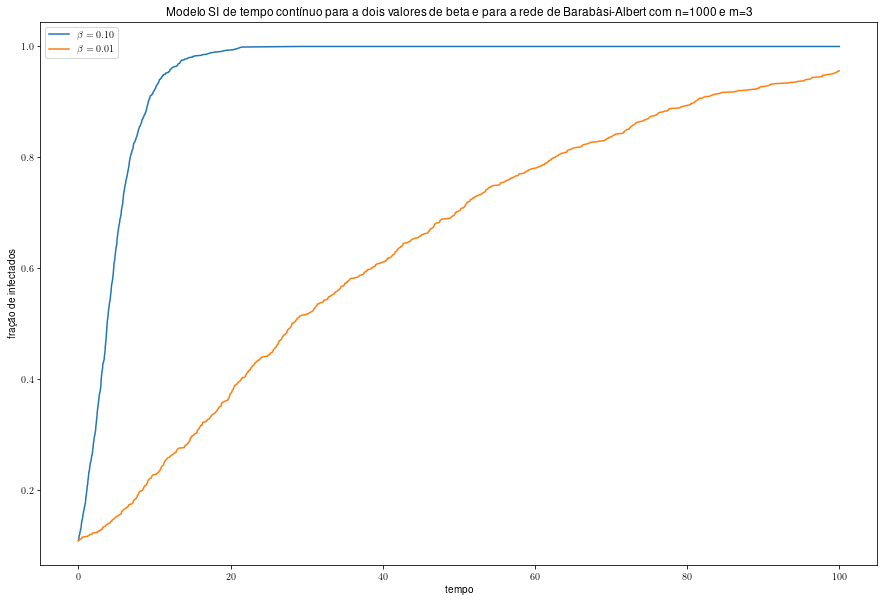

In [26]:
# resultados para dois valores de $\beta$ e o número de ligações por vértice é m=3.

# gerador de números aleatórios
rng = default_rng()

# rede
#G3 = nx.barabasi_albert_graph(1000,3)

#aproximadamente um 10% dos vértices estão inicialmente infectados
init(G3,0.1,rng)

G = deepcopy(G3)
t1, dens1 = sic(G,0.1,100,rng)

G = deepcopy(G3)
t2, dens2 = sic(G,0.01,100,rng)


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
    })

fig = plt.subplots(1,1,figsize=(15,10))
plt.plot(t1,dens1,label=r'$\beta = 0.10$')
plt.plot(t2,dens2,label=r'$\beta = 0.01$')
plt.legend()
plt.xlabel('tempo')
plt.ylabel('fração de infectados')
plt.title('Modelo SI de tempo contínuo para a dois valores de beta e para a rede de Barabási-Albert com n=1000 e m=3')
plt.show()

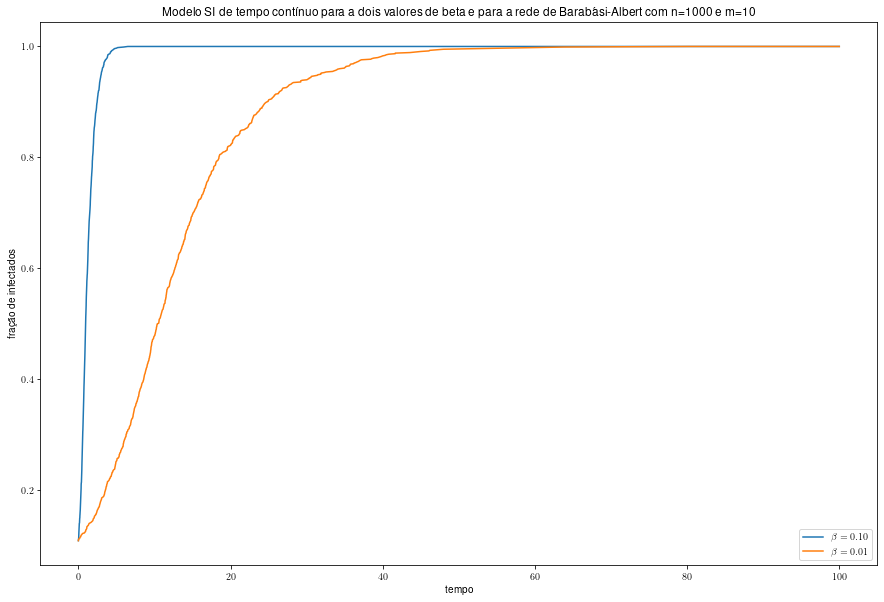

In [27]:
# resultados para dois valores de $\beta$ e o número de ligações por vértice é m=10.

# gerador de números aleatórios
rng = default_rng()

# rede
#G10 = nx.barabasi_albert_graph(1000,10)

#aproximadamente um 10% dos vértices estão inicialmente infectados
init(G10,0.1,rng)

G = deepcopy(G10)
t1, dens1 = sic(G,0.1,100,rng)

G = deepcopy(G10)
t2, dens2 = sic(G,0.01,100,rng)


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
    })

fig = plt.subplots(1,1,figsize=(15,10))
plt.plot(t1,dens1,label=r'$\beta = 0.10$')
plt.plot(t2,dens2,label=r'$\beta = 0.01$')
plt.legend()
plt.xlabel('tempo')
plt.ylabel('fração de infectados')
plt.title('Modelo SI de tempo contínuo para a dois valores de beta e para a rede de Barabási-Albert com n=1000 e m=10')
plt.show()

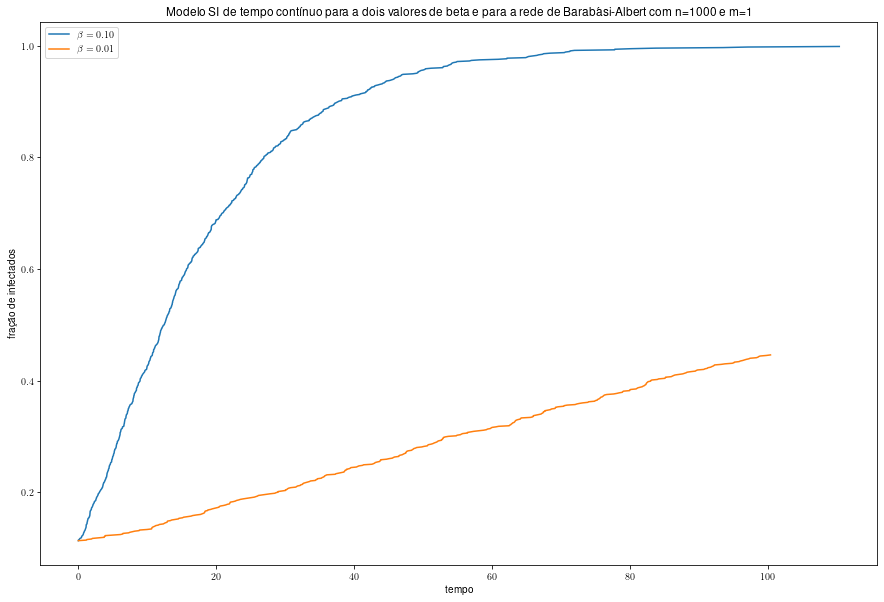

In [28]:
# resultados para dois valores de $\beta$ e o número de ligações por vértice é m=1.

# gerador de números aleatórios
rng = default_rng()

# rede
#G1 = nx.barabasi_albert_graph(1000,1)

#aproximadamente um 10% dos vértices estão inicialmente infectados
init(G1,0.1,rng)

G = deepcopy(G1)
t1, dens1 = sic(G,0.1,100,rng)

G = deepcopy(G1)
t2, dens2 = sic(G,0.01,100,rng)


plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
    })

fig = plt.subplots(1,1,figsize=(15,10))
plt.plot(t1,dens1,label=r'$\beta = 0.10$')
plt.plot(t2,dens2,label=r'$\beta = 0.01$')
plt.legend()
plt.xlabel('tempo')
plt.ylabel('fração de infectados')
plt.title('Modelo SI de tempo contínuo para a dois valores de beta e para a rede de Barabási-Albert com n=1000 e m=1')
plt.show()